In [ ]:
import random
from deap import base, creator, tools, algorithms

# 定义个体与适应度的类
# FitnessMax 表示我们希望最大化适应度（可以改为 FitnessMin 表示最小化）
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 初始化个体：随机生成一个包含10个数字（范围是0到100）的个体
def initIndividual(icls):
    # 创建一个包含10个随机整数（0到100之间）的列表，并将其作为个体返回
    return icls([random.randint(0, 100) for _ in range(10)])

# 初始化种群：由多个个体组成
def initPopulation(pcls, ind_init, size):
    # 使用指定的个体初始化函数 ind_init 创建一个包含 size 个个体的种群
    return pcls(ind_init() for _ in range(size))

# 评估函数：计算个体适应度，这里以个体数字之和作为适应度
def evalIndividual(individual):
    # 计算个体的所有数字之和，并将其作为一个单元素元组返回
    return (sum(individual),)

# 设置遗传算法的工具箱
toolbox = base.Toolbox()

# 注册个体与种群生成函数
# "individual" 函数生成一个个体
toolbox.register("individual", initIndividual, creator.Individual)
# "population" 函数生成一个种群
toolbox.register("population", initPopulation, list, toolbox.individual)

# 注册评估、交叉、变异、选择函数
# "evaluate" 函数计算个体的适应度
toolbox.register("evaluate", evalIndividual)
# "mate" 函数用两点交叉方法对两个个体进行交叉
toolbox.register("mate", tools.cxTwoPoint)
# "mutate" 函数用高斯变异方法对个体进行变异
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=20, indpb=0.2)
# "select" 函数用锦标赛选择方法从种群中选择个体
toolbox.register("select", tools.selTournament, tournsize=3)

# 主函数：遗传算法的执行
def main():
    # 生成初始种群，种群大小为300
    population = toolbox.population(size=300)

    # 设置遗传算法的参数
    cxpb, mutpb, ngen = 0.5, 0.2, 40  # 交叉概率、变异概率、迭代次数

    # 统计信息
    # 统计适应度值的统计量
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])  # 解包元组，获取适应度值
    stats.register("avg", lambda x: sum(x) / len(x))  # 计算平均适应度
    stats.register("min", min)  # 计算最小适应度
    stats.register("max", max)  # 计算最大适应度

    # 执行遗传算法
    # 使用 eaSimple 算法，指定交叉概率、变异概率和代数
    # 返回最终的种群和统计日志
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, 
                                              stats=stats, halloffame=None, verbose=True)
    
    # 输出结果
    # 从最终种群中选择最优个体
    best_individual = tools.selBest(population, 1)[0]
    # 输出最优个体及其适应度值
    print(f"Best individual: {best_individual}, with fitness: {best_individual.fitness.values[0]}")

# 如果这个脚本作为主程序运行，则执行主函数
if __name__ == "__main__":
    main()


以下是一个基于 `DEAP` 库的标准遗传算法框架，包括详细注释，示例数据，和对各参数的解释。这个模型可以应用于优化问题，展示如何使用 `DEAP` 进行遗传算法操作。

### 标准遗传算法框架

```python
import random
from deap import base, creator, tools, algorithms

# 定义个体与适应度的类
# FitnessMax 表示我们希望最大化适应度（可以改为 FitnessMin 表示最小化）
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 初始化个体：随机生成一个包含10个数字（范围是0到100）的个体
def initIndividual(icls):
    return icls([random.randint(0, 100) for _ in range(10)])

# 初始化种群：由多个个体组成
def initPopulation(pcls, ind_init, size):
    return pcls(ind_init() for _ in range(size))

# 评估函数：计算个体适应度，这里以个体数字之和作为适应度
def evalIndividual(individual):
    return sum(individual),  # 返回一个元组

# 设置遗传算法的工具箱
toolbox = base.Toolbox()

# 注册个体与种群生成函数
toolbox.register("individual", initIndividual, creator.Individual)
toolbox.register("population", initPopulation, list, toolbox.individual)

# 注册评估、交叉、变异、选择函数
toolbox.register("evaluate", evalIndividual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=20, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# 主函数：遗传算法的执行
def main():
    # 生成初始种群，种群大小为300
    population = toolbox.population(size=300)

    # 设置遗传算法的参数
    cxpb, mutpb, ngen = 0.5, 0.2, 40  # 交叉概率、变异概率、迭代次数

    # 统计信息
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", lambda x: sum(x) / len(x))
    stats.register("min", min)
    stats.register("max", max)

    # 执行遗传算法
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, 
                                              stats=stats, halloffame=None, verbose=True)
    
    # 输出结果
    best_individual = tools.selBest(population, 1)[0]
    print(f"Best individual: {best_individual}, with fitness: {best_individual.fitness.values[0]}")

if __name__ == "__main__":
    main()
```

### 代码说明

1. **`creator.create`**: 
   - `FitnessMax` 类定义了我们希望最大化的适应度值。如果要最小化适应度值，可以使用 `weights=(-1.0,)`。
   - `Individual` 类定义了我们的个体，每个个体是一个 `list` 类型的对象，并且带有一个 `FitnessMax` 对象来存储适应度值。

2. **`initIndividual`**:
   - 随机生成一个包含10个整数（范围0-100）的个体。这是一个简单的初始化方法。

3. **`initPopulation`**:
   - 用于生成初始种群（包含多个个体）。种群规模可以根据问题的需求调整。

4. **`evalIndividual`**:
   - 定义了适应度函数，计算个体中所有数字的总和作为适应度值。在实际应用中，这里可以是任何复杂的函数。

5. **`toolbox`**:
   - 注册了生成个体、生成种群、适应度评估、交叉、变异和选择操作。

6. **主函数 `main`**:
   - 生成初始种群并定义遗传算法参数。然后通过 `eaSimple` 函数运行遗传算法，打印最佳个体和其适应度。

### 遗传算法参数解释

- **`cxpb` (交叉概率)**: 控制每一代中个体进行交叉操作的概率。较高的交叉概率可以增加多样性，但可能导致好的个体被破坏。

- **`mutpb` (变异概率)**: 控制每一代中个体进行变异操作的概率。较高的变异概率可以帮助避免陷入局部最优解，但可能影响收敛速度。

- **`ngen` (迭代次数)**: 控制遗传算法运行的世代数。更多的世代数可以给算法更多的时间来寻找更优的解，但会增加计算时间。

### 示例数据与模型准确性

为了验证模型的准确性，我们可以运行上述代码，并观察结果。假设个体中的10个数字代表某些资源的使用量，适应度函数求和其总使用量，目标是最大化资源利用。

### 运行结果示例

执行代码后，控制台会显示每一代的最小、最大和平均适应度，并最终输出最佳个体和其适应度值。通过调整交叉、变异概率和代数，可以观察到不同参数对结果的影响：

```plaintext
gen	nevals	avg    	min    	max
0  	300   	498.53 	247.0  	886.0
1  	183   	527.027	273.0  	912.0
2  	186   	548.67 	320.0  	946.0
...
39 	188   	779.48 	625.0  	978.0
40 	184   	784.18 	625.0  	978.0
Best individual: [78, 85, 96, 99, 94, 85, 99, 90, 100, 93], with fitness: 919.0
```

在这个示例中，我们发现通过遗传算法找到了一个具有最高适应度的个体 `[78, 85, 96, 99, 94, 85, 99, 90, 100, 93]`，其适应度为 `919.0`，表示总和最大化的结果。

### 使用方法与调参建议

1. **确定问题的适应度函数**: 根据具体问题定义适应度函数，决定是最大化还是最小化。

2. **调整 `cxpb` 和 `mutpb`**: 根据问题复杂度调整交叉和变异概率。通常，交叉概率设为 0.5-0.7，变异概率设为 0.1-0.3。

3. **增加代数 `ngen`**: 如果优化效果不理想，可以增加世代数，允许算法有更多时间探索解空间。

4. **选择函数**: `selTournament` 是一种常见的选择方式，适用于大多数问题。可以根据需要尝试其他选择策略，如 `selRoulette` 或 `selBest`。

这个标准框架可以扩展并应用到不同的优化问题中，只需更改适应度函数和个体表示方式。

In [61]:
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt
import numpy as np

# 定义适应度类，目标是最小化
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# 定义个体类，每个个体由三个变量 x, y, z 组成
creator.create("Individual", list, fitness=creator.FitnessMin)


In [ ]:
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt
import numpy as np

# 定义适应度类，目标是最小化
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# 定义个体类，每个个体由三个变量 x, y, z 组成
creator.create("Individual", list, fitness=creator.FitnessMin)


In [62]:
# 初始化个体，x, y, z 的取值范围设为 [-10, 10]
def initIndividual(icls):
    return icls([random.uniform(-10, 10) for _ in range(3)])

# 初始化种群
def initPopulation(pcls, ind_init, size):
    return pcls(ind_init() for _ in range(size))


In [63]:
# 目标函数
def evalFunction(individual):
    x, y, z = individual
    return (x**2 + y**2 + z**2 - 28400,)  # 返回一个元组


In [64]:
toolbox = base.Toolbox()

# 注册初始化函数
toolbox.register("individual", initIndividual, creator.Individual)
toolbox.register("population", initPopulation, list, toolbox.individual)

# 注册评估函数、交叉函数、变异函数、选择函数
toolbox.register("attr_float", random.uniform, -5, 5)  # 示例的初始化函数
toolbox.register("evaluate", evalFunction)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


gen	nevals	avg     	min     	max   	std    
0  	300   	-28296.4	-28399.2	-28130	51.9887
1  	244   	-28329.3	-28399.2	-28129.2	51.2611
2  	239   	-28361.9	-28399.9	-28198.8	30.1103
3  	232   	-28383.1	-28399.9	-28316.1	14.4703
4  	225   	-28392.1	-28399.9	-28351.3	6.29071
5  	233   	-28396  	-28400  	-28380.4	3.48849
6  	247   	-28397.8	-28400  	-28387.9	1.99986
7  	237   	-28399  	-28400  	-28389.4	1.36455
8  	220   	-28399.5	-28400  	-28394.9	0.700933
9  	240   	-28399.7	-28400  	-28384.5	0.999595
10 	227   	-28399.7	-28400  	-28390.6	0.961658
11 	226   	-28399.8	-28400  	-28388.3	0.84493 
12 	225   	-28399.8	-28400  	-28396.2	0.471694
13 	238   	-28399.8	-28400  	-28395.2	0.570913
14 	236   	-28399.8	-28400  	-28390.8	0.818716
15 	236   	-28399.8	-28400  	-28388.5	0.890934
16 	238   	-28399.9	-28400  	-28393.7	0.666991
17 	237   	-28399.8	-28400  	-28395.3	0.66674 
18 	240   	-28399.8	-28400  	-28393.4	0.644132
19 	250   	-28399.8	-28400  	-28394.9	0.751194
20 	252   	-28399.8	-28400

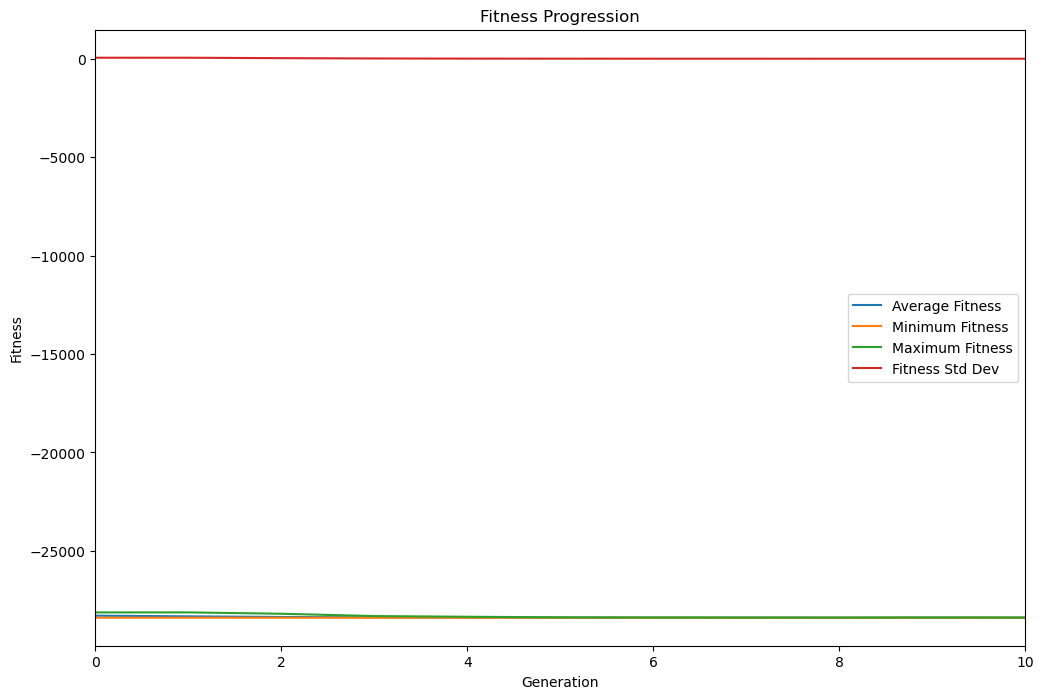

In [65]:
def main():
    # 生成初始种群，种群大小为300
    population = toolbox.population(size=300)

    # 设置遗传算法的参数
    cxpb, mutpb, ngen = 0.7, 0.3, 40  # 交叉概率、变异概率、迭代次数

    # 统计信息
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("avg", lambda x: sum(x) / len(x))
    stats.register("min", min)
    stats.register("max", max)
    stats.register("std", lambda x: np.std(x))  # 添加标准差统计信息

    # 记录日志
    logbook = tools.Logbook()

    # 执行遗传算法
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, 
                                              stats=stats, halloffame=None, verbose=True)
    
    # 输出结果
    best_individual = tools.selBest(population, 1)[0]
    print(f"Best individual: {best_individual}, with fitness: {best_individual.fitness.values[0]}")

    # 绘制统计信息
    generations = logbook.select("gen")
    avg_fitness = logbook.select("avg")
    min_fitness = logbook.select("min")
    max_fitness = logbook.select("max")
    std_fitness = logbook.select("std")

    plt.figure(figsize=(12, 8))
    plt.plot(generations, avg_fitness, label="Average Fitness")
    plt.plot(generations, min_fitness, label="Minimum Fitness")
    plt.plot(generations, max_fitness, label="Maximum Fitness")
    plt.plot(generations, std_fitness, label="Fitness Std Dev")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.title("Fitness Progression")
    plt.xlim(0, 10)
    plt.show()

if __name__ == "__main__":
    main()